In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix
import seaborn as sns



In [2]:
data=pd.read_csv("creditcard.csv")

In [3]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
data.sample(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
101130,67735.0,-2.211461,-1.587571,1.175249,-2.233392,1.658672,4.029604,-1.398234,1.273207,0.391257,...,-0.148294,0.605098,0.643432,1.055168,1.048409,-0.038560,0.659510,-0.034132,29.80,0
97968,66464.0,-0.539547,0.570629,2.111188,0.437103,0.722661,1.535509,0.397172,0.279874,-0.206261,...,0.099312,0.902724,-0.177464,-0.523711,-0.233320,0.593083,-0.001251,-0.131966,0.95,0
50799,44656.0,0.194758,-2.666198,0.559299,-0.125256,-1.745716,1.102971,-0.710154,0.365957,-0.122953,...,0.423152,0.212152,-0.403210,-0.243550,-0.003824,-0.256688,-0.018997,0.098768,535.54,0


In [5]:
data.shape

(284807, 31)

In [6]:
data.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [8]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [9]:
sc = StandardScaler()
data['Amount']=sc.fit_transform(pd.DataFrame(data['Amount']))

In [10]:
data['Amount']

0         0.244964
1        -0.342475
2         1.160686
3         0.140534
4        -0.073403
            ...   
284802   -0.350151
284803   -0.254117
284804   -0.081839
284805   -0.313249
284806    0.514355
Name: Amount, Length: 284807, dtype: float64

In [11]:
data=data.drop(['Time'],axis=1)

In [12]:
data.shape

(284807, 30)

In [13]:
data.duplicated().sum()

9144

In [14]:
data=data.drop_duplicates()

In [15]:
data.shape

(275663, 30)

In [16]:
data['Class'].value_counts()

Class
0    275190
1       473
Name: count, dtype: int64

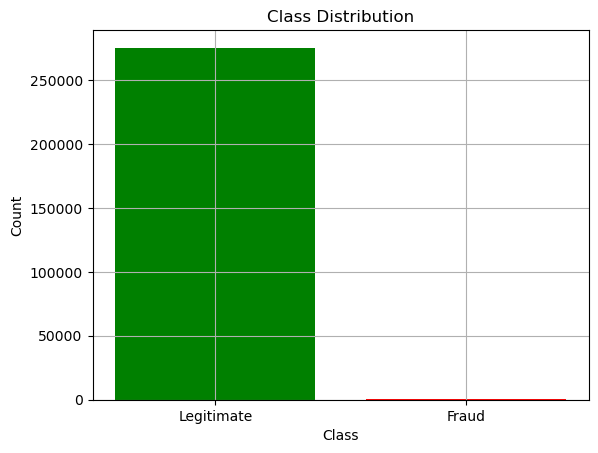

In [17]:
plt.bar(['Legitimate','Fraud'],data['Class'].value_counts().values,color=['green','red'])
plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.grid()
plt.show()

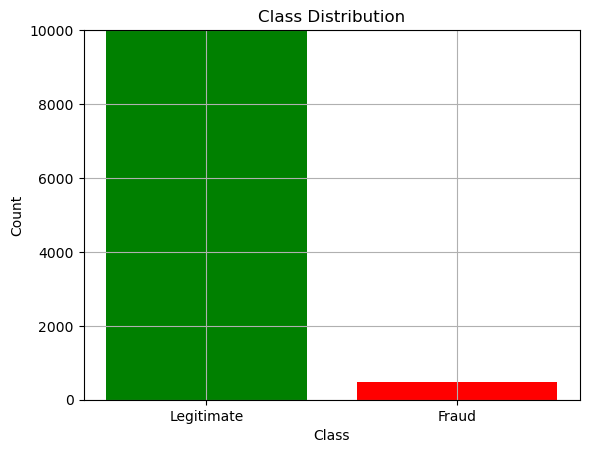

In [18]:
plt.bar(['Legitimate','Fraud'],data['Class'].value_counts().values,color=['green','red'])
plt.ylim(0,10000)
plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.grid()
plt.show()

In [19]:
X = data.drop('Class',axis=1)
y = data['Class']

In [20]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20, random_state=42)

In [21]:
legitimate = data[data['Class']==0]
fraud = data[data['Class']==1]

In [22]:
legitimate.shape

(275190, 30)

In [23]:
fraud.shape

(473, 30)

In [24]:
leg_sample=legitimate.sample(n=473)

In [25]:
new_data= pd.concat([leg_sample,fraud],ignore_index=True)

In [26]:
new_data.shape

(946, 30)

In [27]:
o=new_data['Class'].value_counts()
o

Class
0    473
1    473
Name: count, dtype: int64

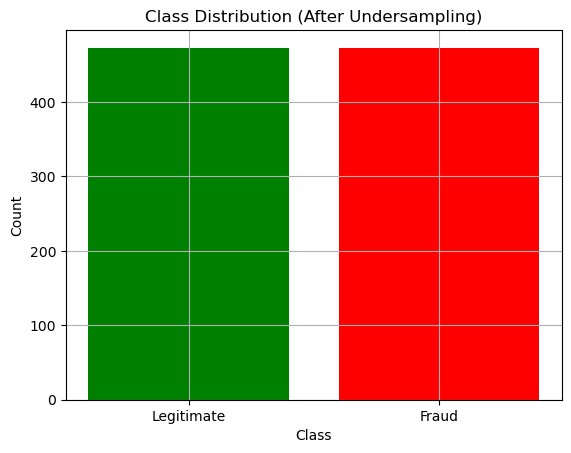

In [28]:
plt.bar(['Legitimate','Fraud'],o.values,color=['green','red'])
plt.title("Class Distribution (After Undersampling)")
plt.xlabel("Class")
plt.ylabel("Count")
plt.grid()
plt.show()

In [29]:
new_data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,1.261442,-1.071030,0.149272,-0.055652,0.743914,4.743538,-1.922334,1.275899,0.447568,0.483752,...,-0.547990,-0.764003,-0.023729,0.993414,0.595539,-0.261696,0.131273,0.035641,-0.313249,0
1,-0.460009,0.225773,1.517135,0.045565,-0.088059,-0.648378,0.428706,-0.133620,-0.063320,-0.646694,...,0.079423,0.390356,0.015616,0.529900,-0.423973,1.099266,0.076776,0.155437,-0.153325,0
2,1.287813,-0.239673,-0.353496,0.217393,-0.006814,-0.154099,0.059210,-0.131991,-1.214687,0.756898,...,-0.692406,-1.628319,0.054479,-0.869081,0.408075,-0.583142,0.027422,0.021027,-0.133335,0
3,-0.604464,1.165543,1.440265,-0.529180,0.308291,-0.916368,0.823720,-1.124731,-0.207796,-0.677245,...,0.532817,-0.835310,0.063913,0.304591,-0.474359,-0.156986,-0.047532,-0.064756,-0.345313,0
4,1.239798,0.178449,0.153279,0.402564,-0.469707,-1.435968,0.333169,-0.354570,-0.040518,-0.119015,...,-0.033055,-0.097890,-0.027986,0.765765,0.474310,0.578263,-0.071911,0.008647,-0.261273,0


## Creating the Logistic Regression Class

In [30]:
class MyLogReg:
    def __init__(self, lr=0.01, epochs=1000):
        self.lr = lr
        self.epochs = epochs
        self.weights = None
        self.bias = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for i in range(self.epochs):
            linear_model = np.dot(X, self.weights) + self.bias
            y_pred = self.sigmoid(linear_model)

            dw = (1/n_samples) * np.dot(X.T, (y_pred - y))
            db = (1/n_samples) * np.sum(y_pred - y)

            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_pred = self.sigmoid(linear_model)
        return np.where(y_pred >= 0.5, 1, 0)


In [31]:
X = new_data.drop('Class',axis=1)
y = new_data['Class']

In [32]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)

In [33]:
log = MyLogReg()
log.fit(X_train,y_train)

In [34]:
y_pred1=log.predict(X_test)

In [35]:
accuracy_score(y_test,y_pred1)

0.9157894736842105

In [36]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91        88
           1       0.92      0.92      0.92       102

    accuracy                           0.92       190
   macro avg       0.92      0.92      0.92       190
weighted avg       0.92      0.92      0.92       190



## OVERSAMPLING -- (SMOTE)

In [37]:
X = data.drop('Class',axis=1)
y = data['Class']

In [38]:
X_res,y_res = SMOTE().fit_resample(X,y)

In [39]:
y_res.value_counts()

Class
0    275190
1    275190
Name: count, dtype: int64

In [40]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_res,y_res,test_size=0.20,random_state=42)

In [41]:
lr_=MyLogReg()

In [42]:
lr_.fit(X_train,y_train)

In [43]:
y_pred=lr_.predict(X_test)

In [44]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94     55073
           1       0.97      0.91      0.94     55003

    accuracy                           0.94    110076
   macro avg       0.94      0.94      0.94    110076
weighted avg       0.94      0.94      0.94    110076



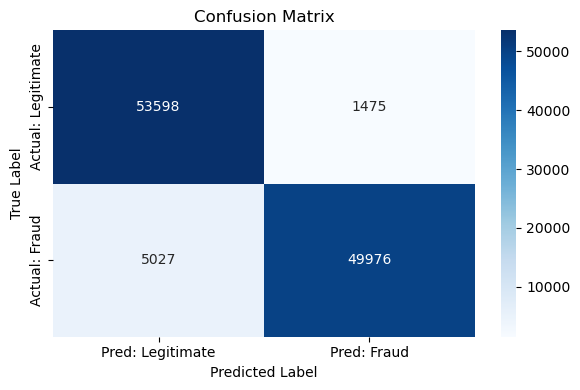

In [45]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',xticklabels=['Pred: Legitimate', 'Pred: Fraud'],yticklabels=['Actual: Legitimate', 'Actual: Fraud'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()